#### Exercise 3: Gaussian Mixture Model (GMM)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.cluster import KMeans

from keras.datasets import mnist

In [3]:
# Load the dataset and process the data
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Combining dataset with labels
train = np.column_stack((train_X.reshape(-1, 28*28), train_y))
test = np.column_stack((test_X.reshape(-1, 28*28), test_y))

# Randomly trimming dataset for better performance
np.random.shuffle(train)
train_y = np.array(train[:100][:, -1])
train = np.array(train[:100][:, :-1].tolist())

train.shape

(100, 784)

#### Part 1: Training the Gaussian Mixture Model (GMM)

In [4]:
# Using Sci-Kit Learn implementation as a design reference
from sklearn.mixture import GaussianMixture

n_clusters = 10
gmm = GaussianMixture(n_clusters, covariance_type='full', random_state=0).fit(train)
labels = gmm.predict(train)
gmm.means_.shape, labels.shape

((10, 784), (100,))

In [191]:
# Training K-Means classifier
def gaussian_mixture_model(x, n_clusters, max_iter):

    # Cleaning Step: Normalizing/re-scaling the data
    x = x/max([max(datapoint) for datapoint in x])

    # Random initialization
    N = x.shape[0]
    pi = np.array([n_clusters**-1] * n_clusters)  # n_clusters x 1
    mu = x[np.random.choice(N, size=n_clusters, replace=False)]  # n_clusters x d
    S = np.array([np.diag(np.add(np.random.rand(1, x.shape[1])[0], 0.5)) for k in range(n_clusters)])  # n_clusters x d x d

    # Track loss
    loss = []

    # Iteratively optimize each GMM
    for iteration in range(max_iter):
        r = np.zeros((n_clusters, N))

        # Calculate new GMM parameters for each cluster
        for k in range(n_clusters):
            r[k] = [(pi[k] * np.linalg.det(S[k])**(-0.5)*np.exp(-0.5*np.dot(np.dot((x[i]-mu[k]), np.linalg.inv(S[k])), (x[i]-mu[k])))) for i in range(N)]
            r[k] = r[k] / sum(r[k])
            pi[k] = sum([r[k][i] for i in range(N)]) / N
            mu[k] = sum([r[k][i] * x[i] for i in range(N)]) / sum(r[k])
            S[k] = sum([np.dot(r[k][i] * x[i], x[i]) * (1/sum(r[k])) for i in range(N)]) - np.dot(mu[k], mu[k])
            
        # Compute loss for this iteration
        loss.append(-sum(np.log([sum(r[k])*(2*np.pi)**(-0.5*x.shape[1]) for k in range(n_clusters)])))
        print("Loss at iteration ", iteration, " is ", loss[iteration])

    # Return cluster centers
    return mu, r, pi, S
    

# mu, r, pi, S = gaussian_mixture_model(train, 5, 1)
gaussian_mixture_model(train, 5, 2)

Loss at iteration  0  is  3602.2376162631545


C:\Users\ephei\AppData\Local\Temp\ipykernel_7212\1053298515.py:22: RuntimeWarning: divide by zero encountered in scalar power
  r[k] = [(pi[k] * np.linalg.det(S[k])**(-0.5)*np.exp(-0.5*np.dot(np.dot((x[i]-mu[k]), np.linalg.inv(S[k])), (x[i]-mu[k])))) for i in range(N)]


LinAlgError: Singular matrix

In [165]:
print("Cluster centers: ", mu)

# Expanding on the first cluster center because the above code is cut off
mu[0]

Cluster centers:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0, 202, 231,  92,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  47, 247, 254,
       250,  30,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 133,
       254, 254, 254,  73,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

**Explanations are in order...**

To preface, the code can only run for 1 iteration because I am unsure how to force the covariance to be a diagonal matrix. Subsequent iterations result in the determinant being undefined and crashing the program. For example, this is a sample covariance matrix for the first cluster after run 1:

In [169]:
S.shape, S[0]

((5, 784, 784),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

The dimensions are correct (a $784\times784$ matrix for each cluster) but it's clearly not a diagonal matrix. The cause of this is the $r_k^i$ calculation being off (only 1 value in $r_k^i$ is non-zero and that is the datapoint which was used to initialize it) which in turn is due to 2 reasons:

1. The covariance matrix is very large, which causes the determinant to be extremely small (essentially 0). The determinant of a diagonal matrix is found by multiplying each entry on the diagonal, so if the variance is in the range [0,1] then it'll go to 0 whereas if the range is $>1$ then it'll tend to infinity. This effect is observed due to the large dimensions of 784x784, so I had to add a $0.5$ constant to the randomly generated covariance to balance out the determinant
2. The 2nd reason is because of the exponent term $-0.5 (x_i - \mu_k)^T S_k^{-1} (x_i - \mu_k)$. For all values where $x_i\ne \mu_k$ (ie. every datapoint except for the one that was randomly initialized as the cluster center), this would result in a massive term, which lead to the entire $r_k^i$ term going to 0. Mathematically, it would be $r_k^i=C\cdot e^{-\infty}\approx 0$. One way to troubleshoot this was scaling the $x_i$ input data and $mu_i$ down to [0,1] so that the inverse covariance would have a stronger regulating effect on the value and the exponent would not go to infinity

In [170]:
# Notice how r_k^i only has 1 non-zero value in each index
r[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [172]:
# In the calculation for r:
# r[k] = [(pi[k] * np.linalg.det(S[k])**(-0.5)*np.exp(-0.5*np.dot(np.dot((x[i]-mu[k]), np.linalg.inv(S[k])), (x[i]-mu[k])))) for i in range(N)]
# notice how the exponent term tends to infinity
mu = train[np.random.choice(train.shape[0], size=n_clusters, replace=False)]  # n_clusters x d
S = np.array([np.diag(np.add(np.random.rand(1, train.shape[1])[0], 0.5)) for _ in range(n_clusters)])  # n_clusters x d x d
exponent = -0.5*np.dot(np.dot((train[0]-mu[1]), np.linalg.inv(S[0])), (train[0]-mu[1]))
print("Exponent term: ", exponent)
print("Base^Exponent: ", np.exp(exponent))

Exponent term:  -4009840.515796998
Base^Exponent:  0.0


In [177]:
# Next I want to demonstrate the issue with taking the determinant of a diagonal covariance matrix

# Case 1: When the covariance range is [0,1], the determinant goes to 0
S = np.array([np.diag(np.random.rand(1, train.shape[1])[0]) for _ in range(n_clusters)])  # n_clusters x d x d
print("Case 1 - Covariance in [0,1]: ", np.linalg.det(S[0]))

# Case 2: When the covariance range is greater than 1, the determinant goes to infinity
# In this case, the range is [1,2]
S = np.array([np.diag(np.add(np.random.rand(1, train.shape[1])[0], 1)) for k in range(n_clusters)])  # n_clusters x d x d
print("Case 2 - Covariance in [1,2]: ", np.linalg.det(S[0]))

# Therefore, careful scaling is necessary to avoid the snowball effect from having 784 dimensions of data

Case 1 - Covariance in [0,1]:  0.0
Case 2 - Covariance in [1,2]:  1.5757227014032263e+127


Issues aside, the remaining report will focus on the implementation process:

**Step 1: Initializing the algorithm**

I randomly initialized the parameters:
* $\pi$: Creating a uniform distribution across all clusters (ex. if `N=4` then it would be `[0.25, 0.25, 0.25, 0.25]`)
* $\mu$: Randomly selecting $N$ points to be the cluster means
* $S$: Randomly generating numbers between $[0,1]$ then adding $0.5$ due to the aforementioned scaling issue. This array was diagonalized via Numpy to satisfy the requirement that the covariance is a diagonal matrix

```py
# Random initialization
pi = np.array([n_clusters**-1] * n_clusters)
mu = x[np.random.choice(N, size=n_clusters, replace=False)]
S = np.array([np.diag(np.add(np.random.rand(1, x.shape[1])[0], 0.5)) for k in range(n_clusters)])

**Step 2: Calculating initial weights, $r^i_k$** (ie. E-step)

I tried to mirror the provided formulas as much as possible:

$r_{ik} \leftarrow \pi_k |S_k|^{0.5} e^{-0.5(x_i-\mu_k)^T S_k^{-1}(x_i-\mu_k)}$

```py
r[k] = [(pi[k] * np.linalg.det(S[k])**(-0.5)*np.exp(-0.5*
                    np.dot(np.dot((x[i]-mu[k]), np.linalg.inv(S[k])), 
                          (x[i]-mu[k])))) for i in range(N)]
```

As mentioned, I found that the exponent term tended to infinity so the overall $r_k^i$ evaluated to 0 which caused a ripple effect for all other parameters

I then followed the assignment walkthrough and normalized the $r_k^i$ vector:

```py 
r[k] = r[k] / sum(r[k])
```

**Step 3: Re-calculating the parameters $\mu, \pi, S$** (ie. M-step)

These also followed the provided equations

$$
\begin{align}
    \pi_k &\leftarrow \frac{r_{.k}}{n} \\
    \mu_k &\leftarrow \frac{\sum^n_{i=1} r_{ik}x_i}{r_{.k}} \\
    S_k &\leftarrow \frac{\sum_{i=1}^n r_{ik} x_i x_i^T}{r_{.k}} - \mu_k \mu_k^T
\end{align}
$$

```py
pi[k] = sum([r[k][i] for i in range(N)]) / N
mu[k] = sum([r[k][i] * x[i] for i in range(N)]) / sum(r[k])
S[k] = sum([np.dot(r[k][i] * x[i], x[i]) * (1/sum(r[k])) for i in range(N)]) - np.dot(mu[k], mu[k])
```

$\mu$ and $x$ should be scaled down ideally to [0,1]. One way is by directly normalizing the data via a scaling factor, s. This is to prevent certain values from growing too fast within the summation operations

#### Step 4: Loss calculation, $L$

I maintained a list tracking the loss: `loss=[]` and appended after each iteration:

```py
loss.append(-sum(np.log([sum(r[k])*(2*np.pi)**(-0.5*x.shape[1]) for k in range(n_clusters)])))
```

Rather than rewrite the complete loss function that was provided, I multiplied $r_k^i$ by $2\pi^{-0.5d}$ as $r_k^i$ includes a significant portion of the loss function:

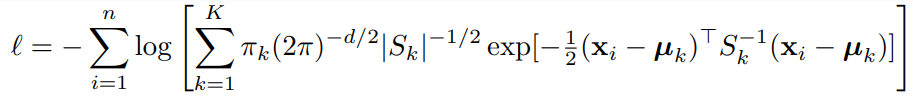

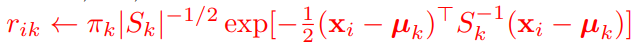

**Note 1: Stopping condition**

I chose to not implement the stopping condition of $L$ being less than a user-defined acceptable error margin. Instead, my implementation runs for the specified iterations even if the code has or has not converged. I chose this to avoid the long runtime that would result from the added iterations. Below is an implementation of the stopping condition:

In [182]:
def gmm(x, max_iter=10, error=10):
    iteration = 0
    loss = []

    while iteration < max_iter:
        # run the algorithm...

        # compute loss and check stopping condition
        if loss[iteration-1] - loss[iteration] < error:
            return
        else:
            iteration += 1
        
    return 

#### Part 3.2: Applying GMM to the MNIST 

I messed up the initial GMM implementation so instead, I'll follow the principles of GMM and create my own version of the algorithm. It will essentially be K-Means but with clusters modelled after Gaussian distributions and movement between clusters dictated by the weights computed from the normal distribution.

In [186]:
def modified_gmm(x, K=5, max_iter=4, error=10):
    iteration = 0
    loss = []

    # Cleaning Step: Normalizing/re-scaling the data
    x = x/max([max(datapoint) for datapoint in x])

    # Step 1: Random initialization 
    N = x.shape[0]
    pi = np.ones((K, N))
    mu = x[np.random.choice(N, size=n_clusters, replace=False)]
    S = [np.random.rand(1, x.shape[1]) for _ in range(K)]

    while iteration < max_iter:

        # Step 2: Initial cluster assignment by Manhattan distance
        for k in range(K):
            for i in range(N):
                pi[k][i] = x[i] - mu[k]

        # Step 4: Compute loss and check stopping condition 
        if iteration > 1 & loss[iteration-1] - loss[iteration] < error:
            return
        iteration += 1

    return 

modified_gmm(train)


ValueError: setting an array element with a sequence.